#### Laplacian variance to determine blurred images  [[guided by]](https://www.geeksforgeeks.org/computer-vision/how-to-check-for-blurry-images-in-your-dataset-using-the-laplacian-method/)

In [40]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mimg

def detect_blur(image_path, threshold=500):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()

    if laplacian_var < threshold:
        return laplacian_var , "Blur"
    else:
        return laplacian_var , "Sharp"


##### blur image dataset from kaggle [[link]](https://www.kaggle.com/datasets/kwentar/blur-dataset)

(np.float64(98.82622222084402), 'Blur')

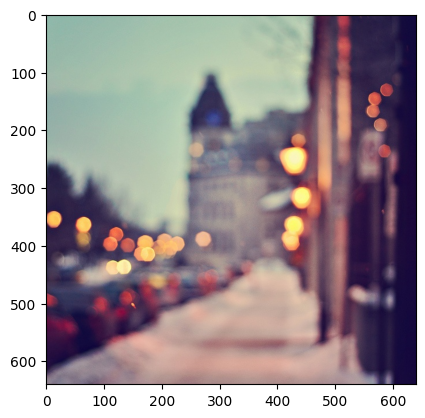

In [41]:
image_path=r"C:\Users\varad\OneDrive\Desktop\9398691ce8c1e06f36c8ee6437b926fb.jpg"
image = mimg.imread(image_path) 
plt.imshow(image)
detect_blur(image_path)

(np.float64(3840.9211725411606), 'Sharp')

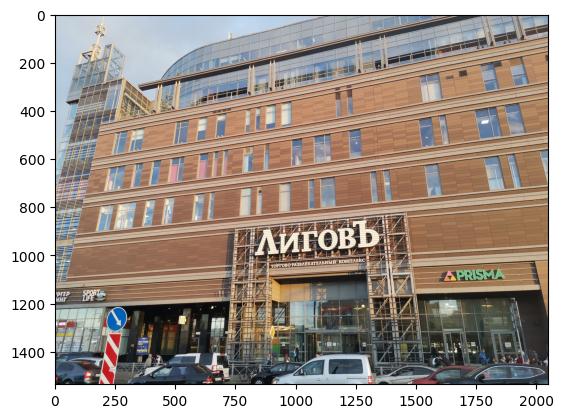

In [43]:
image_path=r"C:\Users\varad\Downloads\archive (1)\blur_dataset_scaled\motion_blurred\6_HUAWEI-MATE20_S.jpg"
image = mimg.imread(image_path) 
plt.imshow(image)
detect_blur(image_path)

In [48]:
import os
import pandas as pd

folder = r"C:\Users\varad\Downloads\archive (1)\blur_dataset_scaled\motion_blurred"
image_files = [f for f in os.listdir(folder)]
paths = [os.path.join(folder, f) for f in image_files]

pd.DataFrame({'image_path': paths}).to_csv("image_paths.csv", index=False)

##### the function below is only to obtain metrics. the output here are 0 or 1

In [50]:
def detect_blur(image_path, threshold=500):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()

    if laplacian_var < threshold:
        return 1
    else:
        return 0


In [52]:
import pandas as pd
df = pd.read_csv("image_paths.csv")
df["preds"] = df["image_path"].apply(detect_blur)
df.to_csv("image_paths.csv", index=False)

In [53]:
df=pd.read_csv("image_paths.csv")

##### created a csv file with three columns. one, path to all images, labels done manually, predictions.

In [54]:
df

,image_path,preds,label
0,C:\Users\varad\Downloads\archive (1)\blur_data...,1,1
1,C:\Users\varad\Downloads\archive (1)\blur_data...,1,1
2,C:\Users\varad\Downloads\archive (1)\blur_data...,1,0
3,C:\Users\varad\Downloads\archive (1)\blur_data...,1,1
4,C:\Users\varad\Downloads\archive (1)\blur_data...,1,1
...,...,...,...
1045,C:\Users\varad\Downloads\archive (1)\blur_data...,1,1
1046,C:\Users\varad\Downloads\archive (1)\blur_data...,0,0
1047,C:\Users\varad\Downloads\archive (1)\blur_data...,1,1
1048,C:\Users\varad\Downloads\archive (1)\blur_data...,1,1


##### obtaining metrics

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [57]:
y_true = df['label']
y_pred = df['preds']

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1-score:", f1_score(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

Accuracy: 0.7666666666666667
Precision: 0.7497255762897914
Recall: 0.9757142857142858
F1-score: 0.8479205462445686

Confusion Matrix:
 [[122 228]
 [ 17 683]]


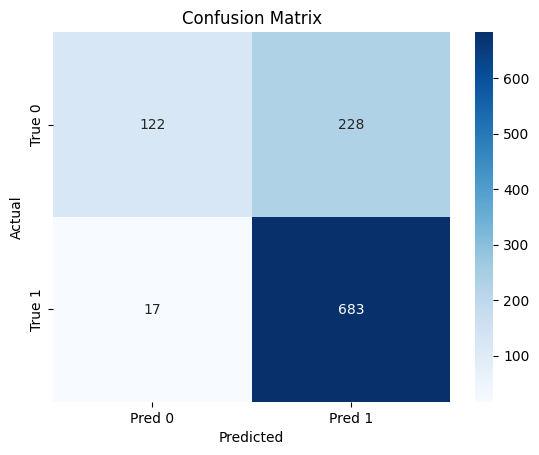

In [59]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()